In [82]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import classes.nb_general_2 as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

# Does Personalization come out the same for NB-pr and PR?

In [122]:
def make_comparison(G, eps=.9):
    # Find L, R, and B
    A = nx.to_numpy_array(G)
    L, T = NB_G.create_s_t(G)
    R = T.T
    C, B = NB_G.to_edge_space(G,graph=True,B = True)
    
    rho = np.random.choice(np.arange(1,11), size=A.shape[0])
    rho = rho/la.norm(rho, ord=1)
    
    # We divide by A.shape[0] under the assumption there is NO source nodes
    # edge_pi = R@la.inv(R.T@R)@np.ones(R.shape[1])/A.shape[0]
    edge_pi = R@rho
    edge_pi = edge_pi/la.norm(edge_pi, ord=1)
    
    # Make it into a dictionary
    vertex_personalization = {}
    for i, val in enumerate(rho):
        vertex_personalization[i] = val
        
    edge_personalization = {}
    for i, val in enumerate(edge_pi):
        edge_personalization[i] = val
        
    # Get it for vertex space
    vertex_pr = nx.pagerank(G, alpha=eps, max_iter=250, personalization=vertex_personalization)
    vertex_pr = np.array([vertex_pr[i] for i in vertex_pr])
    
    # Get it for edge space
    edge_pr = nx.pagerank(C, alpha=eps, max_iter=250, personalization=edge_personalization)
    edge_pr = np.array([edge_pr[i] for i in edge_pr])
    edge_pr = R.T@edge_pr
    
    # Get edge space, wrong personalization
    edge_pr_ = nx.pagerank(C, alpha=eps, max_iter=250)
    edge_pr_ = np.array([edge_pr_[i] for i in edge_pr_])
    edge_pr_ = R.T@edge_pr_

    return vertex_pr, edge_pr, edge_pr_

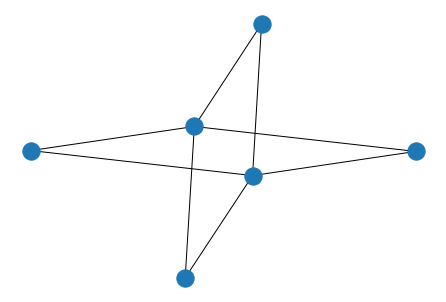

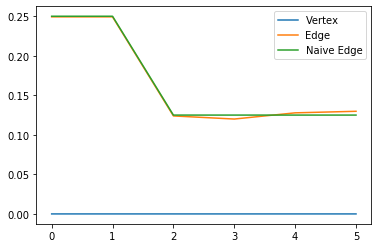

This should be true: False
This should be true: False
0.24922494490524963


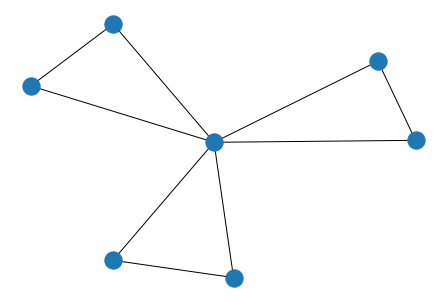

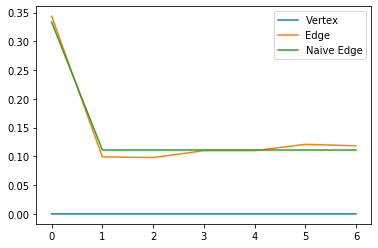

This should be true: False
This should be true: False
0.3435770637645305


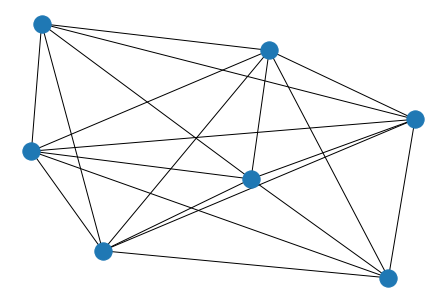

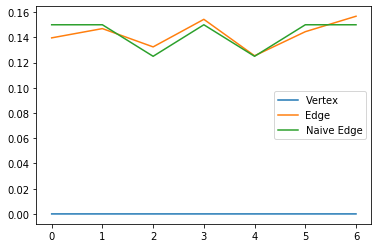

This should be true: False
This should be true: False
0.15674768111594484


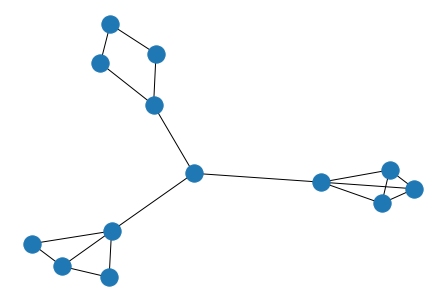

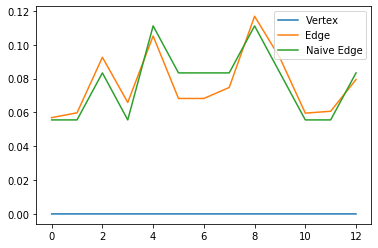

This should be true: False
This should be true: False
0.11679804551333015


In [123]:
for i in range(4):
    G = nx.read_gml("graph_{}.gml".format(i))
    nx.draw(G)
    plt.show()
    vertex, edge, edge_naive = make_comparison(G)
    plt.plot(vertex, label='Vertex')
    plt.plot(edge, label='Edge')
    plt.plot(edge_naive, label='Naive Edge')
    plt.legend(loc='best')
    plt.show()
    print("This should be true: {}".format(np.allclose(vertex, edge)))
    print("This should be true: {}".format(np.allclose(edge, edge_naive)))
    print(la.norm(vertex-edge, ord=np.inf))

1. Results still don't seem to look like they should
2. In some cases edge personalization undershoots, in others it overshoots
3. Perhaps I make an iterative solver by hand to check?

In [57]:
for k in range(10):
    V = np.random.randint(5,11)
    E = np.random.randint(V+1, V*(V-1))
    G = nx.gnm_random_graph(np.random.randin)
    nx.draw(G)
    plt.show()

AttributeError: module 'numpy.random' has no attribute 'randin'